# Image IO & pixel transformation

## Q 0, read the image and display.

Please upload the image to the Colab file. You can file the "File" icon on the left. Please click it and check the tools above. Please click upload to upload the image "Gammar.jpg", which can be downloaded from the Canvas

(419, 505)


Text(0.5, 1.0, 'Original image')

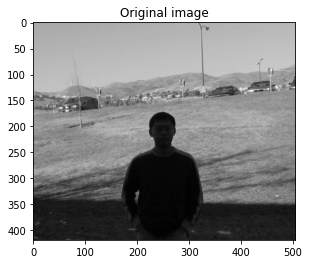

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('sample_data/Gammar.jpg').astype(float)

print(im.shape)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

## Q1： Please design the gammar transformation

Please set c=1 and find the best gammar value that could make the people in the image clearer based on your experiment.

Text(0.5, 1.0, 'New image, Gamma = 0.5')

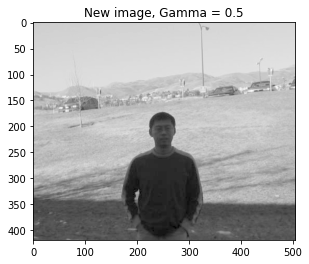

In [ ]:
import numpy as np

def GammarTransform(img, gamma):
  # Trying 4 gamma values.
  for gamma2 in [0.4, 0.5, 0.6, 0.7]:

    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma2, dtype = 'uint8')

    # return new image
    return np.array(255*(img / 255) ** gamma, dtype = 'uint8')


NewImg=GammarTransform(im, 0.5)
plt.figure()
plt.imshow(NewImg, plt.cm.gray)
plt.title('New image, Gamma = 0.5')

## Q2: Reconstruction using 8th bit plane.

- Download the test image of "Lenna.png" and upload it to this Colab workspace.

- The following code will read and convert it into grayscale. You need to reconstruct the image using its 8th bit plane.

(512, 512)


Text(0.5, 1.0, 'grayscale image')

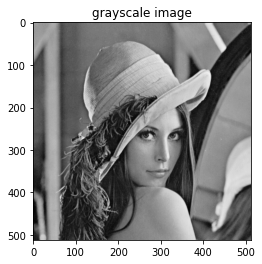

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('sample_data/Lenna.png')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')

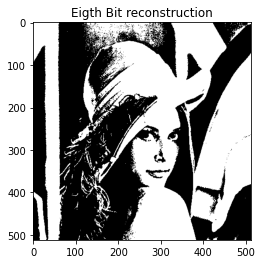

In [ ]:
def The8thBitPlane(img):
  img2 = np.zeros([img.shape[0], img.shape[1]])
  binaryVals = []
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      binaryVals.append(np.binary_repr(int(img[i][j]), width=8))
  eightBitPlane = (np.array([int(i[0]) for i in binaryVals], dtype = np.uint8)*128).reshape(img.shape[0], img.shape[1])

  plt.figure()
  plt.imshow(eightBitPlane, plt.cm.gray)
  plt.title('Eigth Bit reconstruction')

The8thBitPlane(gray_image_array)

## Q3: Histogram Equalization

- Please download the "HE.PNG" image from Canvas and upload to the workspace in Colab (provided)

- Read the image and display the image (provided)

- Generate the histogram of the given image and display below

- Design the histogram Equalization function and display the result. You should not use existing/pre-built histogram equalization function.

- Generate the histogram of the given image and display below

(215, 214)


Text(0.5, 1.0, 'grayscale image')

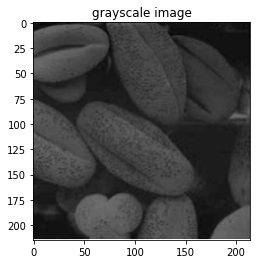

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('sample_data/HE.PNG')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')

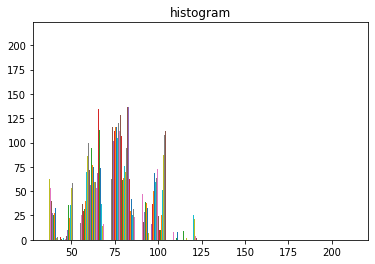

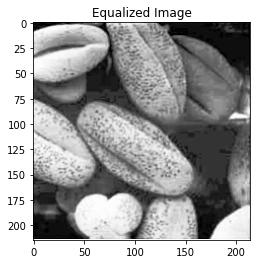

In [ ]:
def GenerateAndDisplayTheHistogram(img):
  """
  Please add your code below to
  1. calculate the histogram of the "img"
  2. Display it using the matplotlibe
  """
  plt.hist(img)
  plt.title("histogram")
  plt.show()




def histogramEqualization(img):
  """
  Please add your code below to
  1. qualize the histogram of the "img"
  2. Display it using the matplotlibe
  """
  #flatten image array and calculate histogram via binning
  histogram_array = np.bincount(img.flatten(), minlength=256)

  #normalize
  num_pixels = np.sum(histogram_array)
  histogram_array = histogram_array/num_pixels

  #normalized cumulative histogram
  chistogram_array = np.cumsum(histogram_array)

  """
  STEP 2: Pixel mapping lookup table
  """
  transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

  """
  STEP 3: Transformation
  """
  # flatten image array into 1D list
  img_list = list(img.flatten())

  # transform pixel values to equalize
  eq_img_list = [transform_map[p] for p in img_list]

  # reshape and write back into img_array
  eq_img_array = np.reshape(np.asarray(eq_img_list), img.shape)

  return eq_img_array

GenerateAndDisplayTheHistogram(gray_image) # print original Hist
newImg = histogramEqualization(gray_image_array) # new image

plt.figure()
plt.title('Equalized Image')
plt.imshow(newImg, plt.cm.gray)

#GenerateAndDisplayTheHistogram(newImg) # print new Hist (equalized)


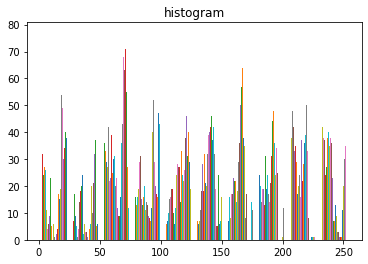

In [ ]:
GenerateAndDisplayTheHistogram(newImg) # print new Hist (equalized)


# Image Filtering

## Q0: mean filter & median filter & Gaussian Filter

- Download the image Noise.PNG from Canvas and upload to the Colab workspace

- Read the file, convert into grayscale and display (provided)

- Apply the mean filter and display (kernel: 3 by 3)

- Apply the median filter and display (kernel: 3 by 3)

- Apply the mean filter and display

(192, 309)


Text(0.5, 1.0, 'grayscale image')

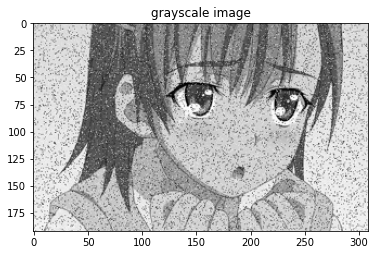

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('sample_data/Noise.PNG')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')

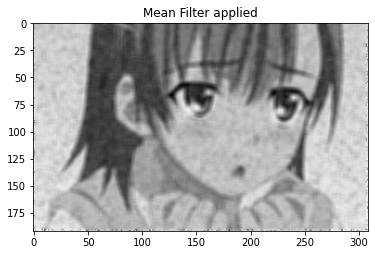

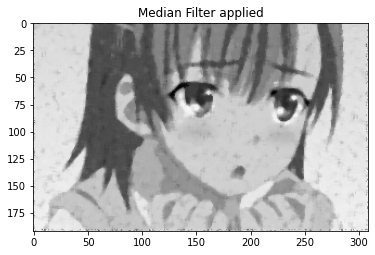

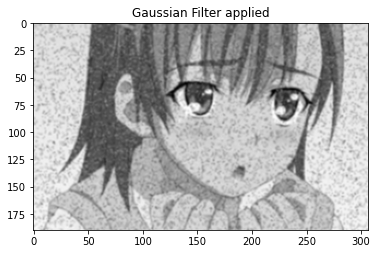

In [ ]:
def meanFilter(img):
  """
  Please add your code below to
  1. apply the mean filter of the "img"
  2. Display it using the matplotlibe
  """
  #im = img
  im = np.array(img)
  w = 2
  for i in range(2,img.shape[0]-2):
    for j in range(2,img.shape[1]-2):
      block = img[i-w:i+w+1, j-w:j+w+1]
      m = np.mean(block,dtype=np.float32)
      im[i][j] = int(m)
  plt.figure()
  plt.imshow(im, plt.cm.gray)
  plt.title('Mean Filter applied')

def medianFilter(img):
  """
  Please add your code below to
  1. apply the median filter of the "img"
  2. Display it using the matplotlibe
  """
  #im = img
  im = np.array(img)
  w = 2
  for i in range(2,img.shape[0]-2):
    for j in range(2,img.shape[1]-2):
      block = img[i-w:i+w+1, j-w:j+w+1]
      m = np.median(block)
      im[i][j] = int(m)
  plt.figure()
  plt.imshow(im, plt.cm.gray)
  plt.title('Median Filter applied')

def convolution(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

def GaussianFilter(img):
  Kernel=[[1.0,2.0,1.0],[2.0,4.0,2.0],[1.0,2.0,1.0]]
  Kernel=np.array(Kernel)
  Kernel=Kernel*(1.0/16)
  """
  Please add your code below to
  1. apply the Gaussian filter of the "img"
  2. Display it using the matplotlibe
  """
  newImg = convolution(img, Kernel)
  plt.figure()
  plt.imshow(newImg, plt.cm.gray)
  plt.title('Gaussian Filter applied')
meanFilter(gray_image_array)
medianFilter(gray_image_array)
GaussianFilter(gray_image_array)

## Q1: Please design a kernel or kernels to sharpen the image

(512, 512)


Text(0.5, 1.0, 'grayscale image')

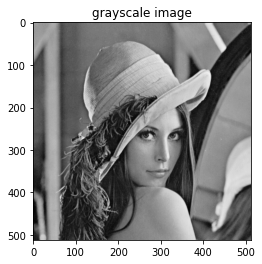

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('sample_data/Lenna.png')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Lenna Original')

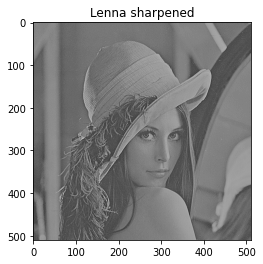

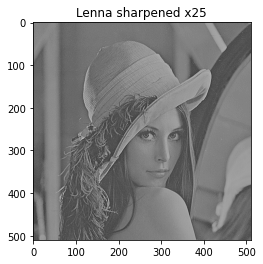

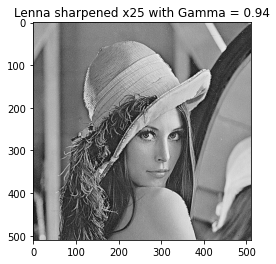

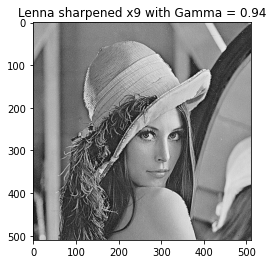

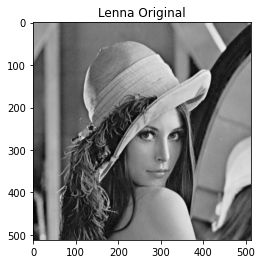

In [ ]:
sharpen9 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
sharpen25 = np.array([[-1,-1,-1,-1,-1],
                      [-1,-1,-1,-1,-1],
                      [-1,-1,25,-1,-1],
                      [-1,-1,-1,-1,-1],
                      [-1,-1,-1,-1,-1]])

def convolution(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

newImg = convolution(gray_image_array, sharpen9)
plt.figure()
plt.imshow(newImg, plt.cm.gray)
plt.title('Lenna sharpened')

newImg2 = convolution(gray_image_array, sharpen9)
newImg3 = GammarTransform(newImg2, 0.94)
plt.figure()
plt.imshow(newImg2, plt.cm.gray)
plt.title('Lenna sharpened x25')

plt.figure()
plt.imshow(newImg3, plt.cm.gray)
plt.title('Lenna sharpened x25 with Gamma = 0.94')

newImg3 = GammarTransform(newImg, 0.94)
plt.figure()
plt.imshow(newImg3, plt.cm.gray)
plt.title('Lenna sharpened x9 with Gamma = 0.94')


plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('Lenna Original')

## Q1: Please show the edges of the content in the image

- Please show the edge along the X axis

- Please show the edge along the y axis

- Please show the edge along both axis by showing using the magnitude of X and Y


(512, 512)


Text(0.5, 1.0, 'grayscale image')

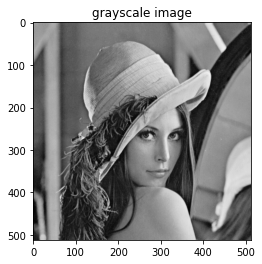

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('sample_data/Lenna.png')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')

Text(0.5, 1.0, 'X and Y axis Edge')

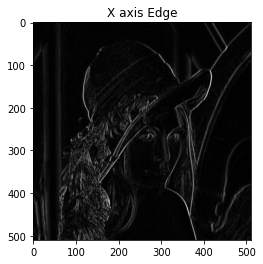

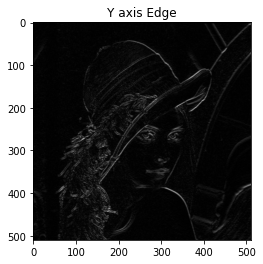

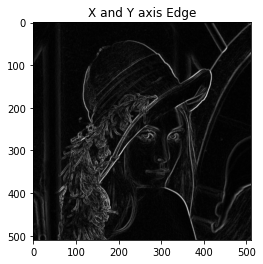

In [ ]:
# show the dege along the X axis below
XaxisK = np.array([[-1.0, 0.0, 1.0],
                   [-1.0, 0.0, 1.0],
                   [-1.0, 0.0, 1.0]])
XAxisEdgeImg = abs(convolution(gray_image_array, XaxisK))
plt.figure()
plt.imshow(XAxisEdgeImg, plt.cm.gray)
plt.title('X axis Edge')

# show the dege along the y axis below
YaxisK = np.array([[1.0, 1.0, 1.0],
                   [0.0, 0.0, 0.0],
                   [-1.0, -1.0, -1.0]])
YAxisEdgeImg = abs(convolution(gray_image_array, YaxisK))
plt.figure()
plt.imshow(YAxisEdgeImg, plt.cm.gray)
plt.title('Y axis Edge')



# show the dege along both axis below
BothAxis = abs(XAxisEdgeImg) + abs(YAxisEdgeImg)
plt.figure()
plt.imshow(BothAxis, plt.cm.gray)
plt.title('X and Y axis Edge')